In [1]:
#Data Cleaning to check if there are any NAN, duplicates or any wrong values.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
import random
import matplotlib.colors as mcolors
import matplotlib.lines as mlines

#from library.sb_utils import save_file

In [3]:
#the supplied CSV data file is the raw_data directory
CO2_data=pd.read_csv('/Users/sidrakamal/Desktop/archive/CO2 Emissions_Canada.csv')
#Call the info method on C02_data to see a summary of the data
CO2_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [4]:
CO2_data.shape

(7385, 12)

In [5]:
#Call the head method on C02_data to print the first several rows of the data
CO2_data.head(10)


,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
5,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28,230
6,ACURA,TL,MID-SIZE,3.5,6,AS6,Z,11.8,8.1,10.1,28,232
7,ACURA,TL AWD,MID-SIZE,3.7,6,AS6,Z,12.8,9.0,11.1,25,255
8,ACURA,TL AWD,MID-SIZE,3.7,6,M6,Z,13.4,9.5,11.6,24,267
9,ACURA,TSX,COMPACT,2.4,4,AS5,Z,10.6,7.5,9.2,31,212


In [6]:
#removing the Fuel Consumption Comb column because it is not needed
CO2_data.drop(columns='Fuel Consumption Comb (mpg)',inplace=True)
CO2_data.head(5)

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,244


In [7]:
#Removing inconsistent categories from Make, Model, Vehicle Class, Transmission and Fuel Type

In [8]:
# Create a dictionary which will remap the values and replace the abbreviation in Fuel Type

dict = {'Z' : 'Premium gasoline', 'D' : 'Diesel', 'E' : 'Ethanol', 'N' : 'Natural gas','X': 'Regular gasoline'}
  
# Print the dictionary
print(dict)
  
# Remap the values of the dataframe
CO2_data=CO2_data.replace({"Fuel Type": dict})
CO2_data.head(5)

{'Z': 'Premium gasoline', 'D': 'Diesel', 'E': 'Ethanol', 'N': 'Natural gas', 'X': 'Regular gasoline'}


,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Premium gasoline,9.9,6.7,8.5,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Premium gasoline,11.2,7.7,9.6,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Premium gasoline,6.0,5.8,5.9,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Premium gasoline,12.7,9.1,11.1,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Premium gasoline,12.1,8.7,10.6,244


In [9]:
CO2_data['Make'] = CO2_data['Make'].str.upper()
CO2_data['Model'] = CO2_data['Model'].str.upper()
CO2_data['Vehicle Class'] = CO2_data['Vehicle Class'].str.upper()
CO2_data['Transmission'] = CO2_data['Transmission'].str.upper()
CO2_data.tail(5)



,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km)
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Premium gasoline,10.7,7.7,9.4,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Premium gasoline,11.2,8.3,9.9,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Premium gasoline,11.7,8.6,10.3,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Premium gasoline,11.2,8.3,9.9,232
7384,VOLVO,XC90 T6 AWD,SUV - STANDARD,2.0,4,AS8,Premium gasoline,12.2,8.7,10.7,248


In [10]:
#Count (using `.sum()`) the number of missing values (`.isnull()`) in each column of 
#C02_data as well as the percentages (using `.mean()` instead of `.sum()`).
#Order them (increasing or decreasing) using sort_values
#Call `pd.concat` to present these in a single table (DataFrame) with the helpful column names
missing = pd.concat([CO2_data.isnull().sum(), 100 * CO2_data.isnull().mean()], axis=1)
missing.columns = ['count', '%']
missing.sort_values(by='count')

,count,%
Make,0,0.0
Model,0,0.0
Vehicle Class,0,0.0
Engine Size(L),0,0.0
Cylinders,0,0.0
Transmission,0,0.0
Fuel Type,0,0.0
Fuel Consumption City (L/100 km),0,0.0
Fuel Consumption Hwy (L/100 km),0,0.0
Fuel Consumption Comb (L/100 km),0,0.0


In [11]:
CO2_data.nunique()

Make                                  42
Model                               1596
Vehicle Class                         16
Engine Size(L)                        51
Cylinders                              8
Transmission                          27
Fuel Type                              5
Fuel Consumption City (L/100 km)     211
Fuel Consumption Hwy (L/100 km)      143
Fuel Consumption Comb (L/100 km)     181
CO2 Emissions(g/km)                  331
dtype: int64

In [12]:
CO2_data.dtypes

Make                                 object
Model                                object
Vehicle Class                        object
Engine Size(L)                      float64
Cylinders                             int64
Transmission                         object
Fuel Type                            object
Fuel Consumption City (L/100 km)    float64
Fuel Consumption Hwy (L/100 km)     float64
Fuel Consumption Comb (L/100 km)    float64
CO2 Emissions(g/km)                   int64
dtype: object

In [13]:
#Categorical data
types=CO2_data.select_dtypes(include='object')
types

,Make,Model,Vehicle Class,Transmission,Fuel Type
0,ACURA,ILX,COMPACT,AS5,Premium gasoline
1,ACURA,ILX,COMPACT,M6,Premium gasoline
2,ACURA,ILX HYBRID,COMPACT,AV7,Premium gasoline
3,ACURA,MDX 4WD,SUV - SMALL,AS6,Premium gasoline
4,ACURA,RDX AWD,SUV - SMALL,AS6,Premium gasoline
...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,AS8,Premium gasoline
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,AS8,Premium gasoline
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,AS8,Premium gasoline
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,AS8,Premium gasoline


In [14]:
CO2_data['Model'].tail()

7380    XC40 T5 AWD
7381    XC60 T5 AWD
7382    XC60 T6 AWD
7383    XC90 T5 AWD
7384    XC90 T6 AWD
Name: Model, dtype: object

In [15]:
new_model = CO2_data['Model'].unique()
new_model

array(['ILX', 'ILX HYBRID', 'MDX 4WD', ...,
       'TACOMA 4WD D-CAB TRD OFF-ROAD/PRO', 'ATLAS CROSS SPORT 4MOTION',
       'XC40 T4 AWD'], dtype=object)

In [16]:
#To check for the duplicated rows in the dataframe
duplicate=CO2_data.duplicated().sum()
duplicate

1394

In [17]:
#removing the duplicate values from the dataframe
df=CO2_data.drop_duplicates()
#finding out the rows and columns after the removal of the duplicates
df.shape

(5991, 11)

In [18]:
#Generate descriptive statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Engine Size(L),5991.0,3.173043,1.365751,0.9,2.0,3.0,3.8,8.4
Cylinders,5991.0,5.633784,1.851161,3.0,4.0,6.0,6.0,16.0
Fuel Consumption City (L/100 km),5991.0,12.650075,3.560977,4.2,10.1,12.1,14.7,30.6
Fuel Consumption Hwy (L/100 km),5991.0,9.091320,2.293336,4.0,7.5,8.7,10.3,20.6
Fuel Consumption Comb (L/100 km),5991.0,11.049224,2.957762,4.1,8.9,10.6,12.7,26.1
CO2 Emissions(g/km),5991.0,251.638124,59.246929,96.0,208.0,246.0,290.0,522.0


From this table we can see that an average car consumes more fuel in the City than in the Highway!

In [19]:
df['Make'].unique()

array(['ACURA', 'ALFA ROMEO', 'ASTON MARTIN', 'AUDI', 'BENTLEY', 'BMW',
       'BUICK', 'CADILLAC', 'CHEVROLET', 'CHRYSLER', 'DODGE', 'FIAT',
       'FORD', 'GMC', 'HONDA', 'HYUNDAI', 'INFINITI', 'JAGUAR', 'JEEP',
       'KIA', 'LAMBORGHINI', 'LAND ROVER', 'LEXUS', 'LINCOLN', 'MASERATI',
       'MAZDA', 'MERCEDES-BENZ', 'MINI', 'MITSUBISHI', 'NISSAN',
       'PORSCHE', 'RAM', 'ROLLS-ROYCE', 'SCION', 'SMART', 'SRT', 'SUBARU',
       'TOYOTA', 'VOLKSWAGEN', 'VOLVO', 'GENESIS', 'BUGATTI'],
      dtype=object)

In [20]:
df['Model'].value_counts().sort_values(ascending=False).head()

MUSTANG          33
F-150 FFV        32
F-150 FFV 4X4    31
SIERRA 4WD       27
SILVERADO 4WD    26
Name: Model, dtype: int64

In [21]:
df['Vehicle Class'].value_counts().sort_values(ascending=False).head()

SUV - SMALL       961
MID-SIZE          931
COMPACT           888
SUV - STANDARD    590
SUBCOMPACT        517
Name: Vehicle Class, dtype: int64

In [22]:
df['Engine Size(L)'].value_counts().sort_values(ascending=False).head()

2.0    1212
3.0     641
3.5     409
3.6     403
2.5     338
Name: Engine Size(L), dtype: int64

In [23]:
df['Cylinders'].value_counts().sort_values(ascending=False).head()

4     2612
6     1931
8     1170
12     131
3       80
Name: Cylinders, dtype: int64

In [24]:
df['Transmission'].value_counts().sort_values(ascending=False).head()

AS6    1103
AS8    1019
M6      724
A6      671
AM7     357
Name: Transmission, dtype: int64

In [25]:
df['Fuel Type'].value_counts().sort_values(ascending=False).head()

Regular gasoline    2878
Premium gasoline    2641
Ethanol              325
Diesel               146
Natural gas            1
Name: Fuel Type, dtype: int64

In [26]:
df['Make'].value_counts().sort_values(ascending=False).head()

FORD             563
CHEVROLET        503
BMW              492
MERCEDES-BENZ    363
GMC              278
Name: Make, dtype: int64

3039 people use Regular gasoline as a fuel in their cars

In [27]:
model=df['Make'].value_counts().sort_values(ascending=False).head(10)

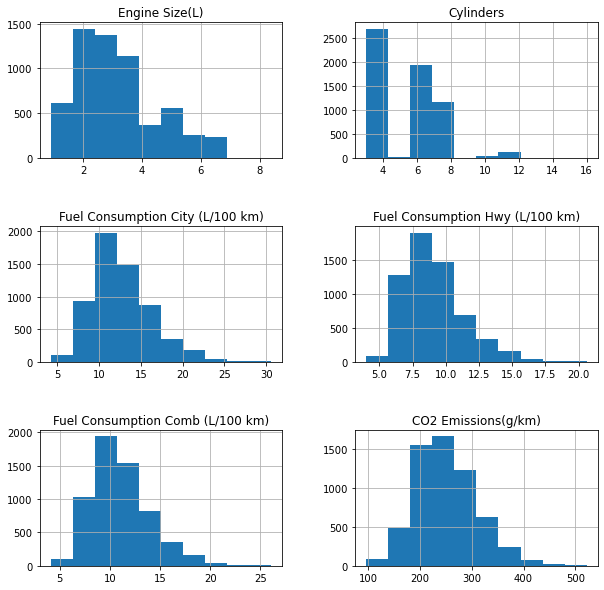

In [28]:
df.hist(figsize=(10,10))
plt.subplots_adjust(hspace=0.5);

Text(0.5, 1.0, 'Most Popular Car in Canada')

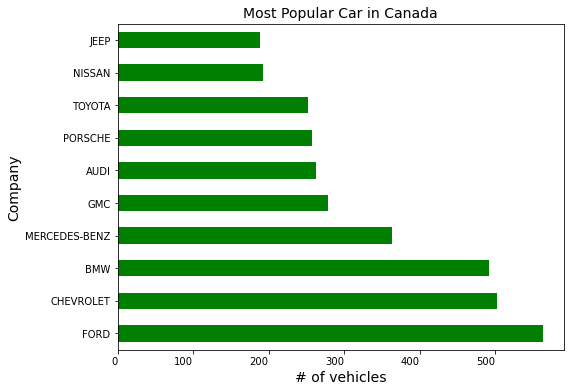

In [29]:
model.plot(kind='barh', figsize=(8, 6), color='g')
plt.xticks(rotation=0,horizontalalignment='right')
plt.ylabel("Company", fontsize=14)
plt.xlabel("# of vehicles", fontsize=14)
plt.title('Most Popular Car in Canada', fontsize=14)


From this bar graph, Ford is the most popular choice in Canada.

In [30]:
most_fuel_means = df.groupby(['Make','Model'])[['CO2 Emissions(g/km)']].mean()
CO2_emissions=most_fuel_means.sort_values(by='CO2 Emissions(g/km)', ascending=False).head(5)
CO2_emissions

CO2 Emissions(g/km)
Make          Model                                         
BUGATTI       CHIRON                                   522.0
FORD          E350 WAGON                               488.0
MERCEDES-BENZ AMG G 65                                 472.0
LAMBORGHINI   AVENTADOR S ROADSTER                     464.0
              AVENTADOR ROADSTER LP 740                461.0

From this table, car company 'BUGATI' and model CHIRON has the highest fuel consumption in the city with an average of 26.8 L/100 km.

In [31]:
#Looking at Ford Models specifically since it is the most popular company for cars used in Canada
#Which Ford Model consumes the most fuel and is also producing the highest CO2 emissions?
ford=df[df.Make == 'FORD']
ford.sort_values(by='Fuel Consumption City (L/100 km)', ascending=False).head(5)

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km)
351,FORD,E350 WAGON FFV,VAN - PASSENGER,5.4,8,A4,Ethanol,26.7,20.5,23.9,382
348,FORD,E150 WAGON FFV,VAN - PASSENGER,4.6,8,A4,Ethanol,25.5,20.0,23.0,368
346,FORD,E150 VAN FFV,VAN - CARGO,5.4,8,A4,Ethanol,24.9,19.6,22.5,360
362,FORD,EXPEDITION 4X4 FFV,SUV - STANDARD,5.4,8,A6,Ethanol,24.5,18.0,21.6,346
344,FORD,E150 VAN FFV,VAN - CARGO,4.6,8,A4,Ethanol,24.1,19.2,21.9,350


From this table, Ford Model "E350 WAGON FFV" consumes the most fuel in the city with an average fuel consumption of 26.7(L/100 km)

In [32]:
df_ford_model=ford["Model"].value_counts().reset_index().rename(columns={'index':'Model','Model':'Count'}).head(10)
df_ford_model



,Model,Count
0,MUSTANG,33
1,F-150 FFV,32
2,F-150 FFV 4X4,31
3,FOCUS FFV,24
4,F-150 4X4,20
5,F-150,19
6,EDGE AWD,17
7,MUSTANG CONVERTIBLE,17
8,FUSION,15
9,ESCAPE AWD,12


Text(0.5, 1.0, 'Most Popular Ford Model in Canada')

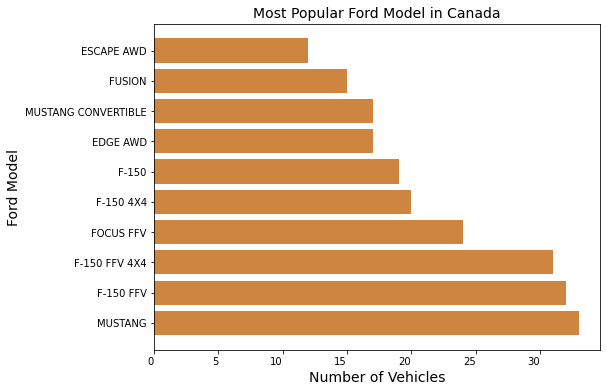

In [33]:

X = list(df_ford_model.iloc[:, 0])
Y = list(df_ford_model.iloc[:, 1])
# Plot the data using bar() method
plt.figure(figsize=(8,6))
plt.barh(X, Y, color='peru')
plt.xticks(rotation=0,horizontalalignment='right')
plt.ylabel("Ford Model", fontsize=14)
plt.xlabel("Number of Vehicles", fontsize=14)
plt.title('Most Popular Ford Model in Canada', fontsize=14)

Most popular Ford Model is F-150-FFV in Canada

In [34]:
grouped_df = df.groupby(['Make']).agg({'CO2 Emissions(g/km)': ['mean', 'min', 'max', 'median']})
grouped_df.columns = ['CO2 Emissions(g/km)_mean', 'CO2 Emissions(g/km)_min', 'CO2 Emissions(g/km)_max', 'CO2 Emissions_median']
grouped_df = grouped_df.reset_index()
grouped_df.head(5)

,Make,CO2 Emissions(g/km)_mean,CO2 Emissions(g/km)_min,CO2 Emissions(g/km)_max,CO2 Emissions_median
0,ACURA,222.428571,136,267,228.0
1,ALFA ROMEO,236.384615,193,292,218.0
2,ASTON MARTIN,344.282051,264,450,345.0
3,AUDI,252.676806,177,409,242.0
4,BENTLEY,367.914286,291,465,373.0


In [35]:
grouped = df.groupby(['Make']).agg({'Make':'count'})
grouped.rename(columns = {'Make':'Number_vehicles'},inplace=True)
grouped= grouped.reset_index(level=0)
merged=pd.merge(grouped_df, grouped)
merged['Total_CO2_Emissions']=merged['CO2 Emissions(g/km)_mean']*merged['Number_vehicles']
merged.head(10)
#merged.sort_values(by='Total_CO2_Emissions',ascending=False).head(10)
merged1=merged.sort_values(by='CO2 Emissions(g/km)_mean', ascending=False).head(10)
merged1

,Make,CO2 Emissions(g/km)_mean,CO2 Emissions(g/km)_min,CO2 Emissions(g/km)_max,CO2 Emissions_median,Number_vehicles,Total_CO2_Emissions
6,BUGATTI,522.000000,522,522,522.0,1,522.0
22,LAMBORGHINI,402.270270,331,493,384.0,37,14884.0
37,SRT,389.000000,389,389,389.0,2,778.0
34,ROLLS-ROYCE,388.204545,359,404,391.5,44,17081.0
4,BENTLEY,367.914286,291,465,373.0,35,12877.0
2,ASTON MARTIN,344.282051,264,450,345.0,39,13427.0
26,MASERATI,319.612245,286,360,321.0,49,15661.0
15,GMC,301.910072,198,465,299.0,278,83931.0
33,RAM,295.056338,225,382,289.0,71,20949.0
23,LAND ROVER,290.301370,223,365,285.0,73,21192.0


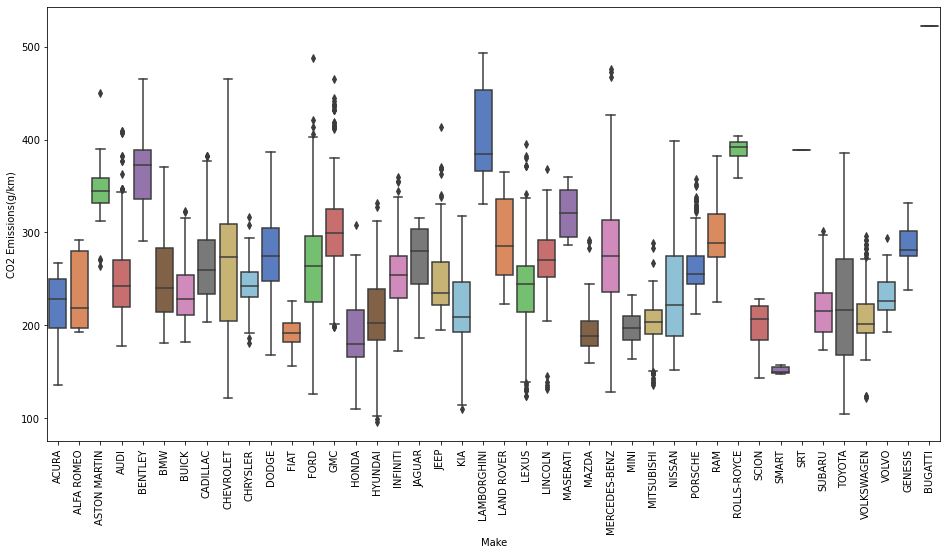

In [36]:
plt.figure(figsize = (16,8))
sns.boxplot(x="Make", y="CO2 Emissions(g/km)", data=df, palette='muted')
plt.xticks(rotation = 90)
plt.show()

Mercedes-Benz has a lot of variability in terms of CO2 Emissions. FORD,GMC,CHEVROLET,BENTLEY,LAMBORGHINI,ROLLS-ROYCE AND ASTON MARTIN are in the upper range for high CO2 emissions.

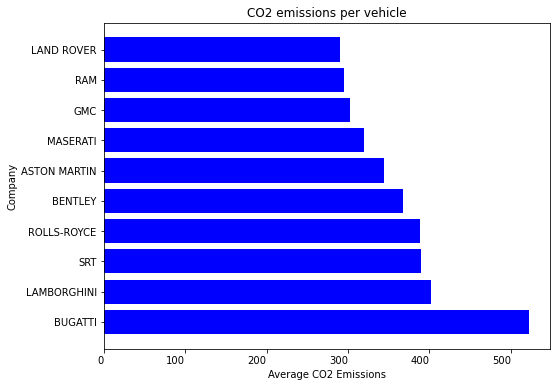

In [37]:
X = list(merged1.iloc[:, 0])
Y = list(merged1.iloc[:, 1])
# Plot the data using bar() method
plt.figure(figsize=(8,6))
plt.barh(X, Y, color='b')
plt.title("CO2 emissions per vehicle")
plt.xticks(rotation=0,horizontalalignment='right')
plt.ylabel("Company")
plt.xlabel("Average CO2 Emissions")
plt.show()

The company BUGATTI has the highest emission/vehicle

In [38]:
most=merged[merged['Number_vehicles']>200]
most=most.sort_values(by='CO2 Emissions(g/km)_mean', ascending=False)
most

,Make,CO2 Emissions(g/km)_mean,CO2 Emissions(g/km)_min,CO2 Emissions(g/km)_max,CO2 Emissions_median,Number_vehicles,Total_CO2_Emissions
15,GMC,301.910072,198,465,299.0,278,83931.0
28,MERCEDES-BENZ,278.823691,128,476,274.0,363,101213.0
9,CHEVROLET,264.669980,121,465,273.0,503,133129.0
13,FORD,261.591474,126,488,264.0,563,147276.0
32,PORSCHE,261.482490,212,358,255.0,257,67201.0
3,AUDI,252.676806,177,409,242.0,263,66454.0
5,BMW,252.483740,181,370,239.5,492,124222.0
39,TOYOTA,223.035714,104,385,216.5,252,56205.0


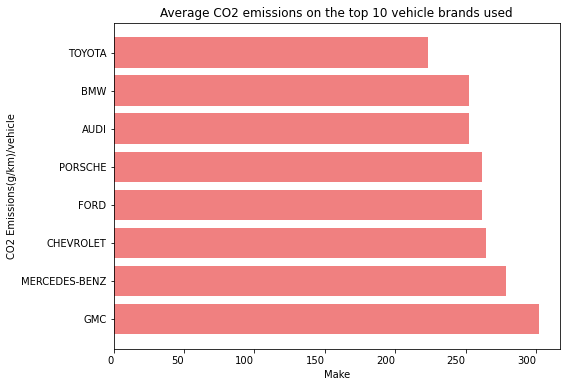

In [39]:
X = list(most.iloc[:, 0])
Y = list(most.iloc[:, 1])
# Plot the data using bar() method
plt.figure(figsize=(8,6))
plt.barh(X, Y, color='lightcoral')
plt.title("Average CO2 emissions on the top 10 vehicle brands used")
plt.xticks(rotation=0,horizontalalignment='right')
plt.ylabel("CO2 Emissions(g/km)/vehicle")
plt.xlabel("Make")
plt.show()


From the most popular car brands used in Canada, GMC has the highest CO2 emissions/vehicle

In [40]:
grouped_df_engine = df.groupby(['Engine Size(L)']).agg({'CO2 Emissions(g/km)': ['mean', 'min', 'max']})
grouped_df_engine.columns = ['CO2 Emissions(g/km)_mean', 'CO2 Emissions(g/km)_min', 'CO2 Emissions(g/km)_max']
grouped_df_engine=grouped_df_engine.reset_index()
grouped_df_engine.sort_values(by='CO2 Emissions(g/km)_mean',ascending=False).head(10)

,Engine Size(L),CO2 Emissions(g/km)_mean,CO2 Emissions(g/km)_min,CO2 Emissions(g/km)_max
49,8.0,522.000000,522,522
45,6.5,451.176471,412,493
48,6.8,432.375000,405,488
47,6.7,394.043478,382,404
41,6.0,386.523256,327,476
46,6.6,378.416667,354,400
50,8.4,378.400000,363,389
35,5.4,373.375000,346,421
40,5.9,360.500000,359,365
33,5.2,353.439024,304,409


/Users/sidrakamal/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


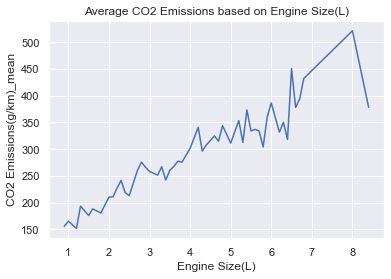

In [41]:
sns.set_theme(style="darkgrid")
sns.set(font_scale = 1)

x = grouped_df_engine.iloc[:,0]
y = grouped_df_engine.iloc[:,1]

p=sns.lineplot(x, y)
sns.set(rc = {'figure.figsize':(10,5)})
p.set_title("Average CO2 Emissions based on Engine Size(L)")
plt.show()

In [42]:
grouped_df_transmission = df.groupby(['Transmission']).agg({'CO2 Emissions(g/km)': ['mean', 'min', 'max']})
grouped_df_transmission.columns = ['CO2 Emissions(g/km)_mean', 'CO2 Emissions(g/km)_min', 'CO2 Emissions(g/km)_max']
grouped_df_transmission=grouped_df_transmission.reset_index()
grouped_df_transmission=grouped_df_transmission.sort_values(by='CO2 Emissions(g/km)_mean',ascending=False).head(10)
grouped_df_transmission

,Transmission,CO2 Emissions(g/km)_mean,CO2 Emissions(g/km)_min,CO2 Emissions(g/km)_max
4,A7,316.880952,248,473
0,A10,312.040000,238,357
1,A4,301.206897,168,421
2,A5,300.013889,172,488
5,A8,285.525714,181,413
12,AS10,283.852349,168,367
3,A6,279.201192,162,465
16,AS7,277.758993,128,476
14,AS5,272.375000,191,321
9,AM7,271.476190,122,522


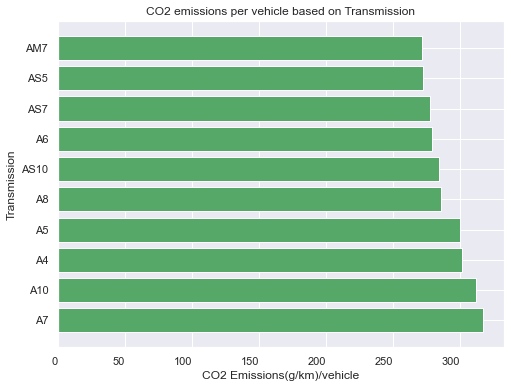

In [43]:
X = list(grouped_df_transmission.iloc[:, 0])
Y = list(grouped_df_transmission.iloc[:, 1])
# Plot the data using bar() method
plt.figure(figsize=(8,6))
plt.barh(X, Y, color='g')
plt.title("CO2 emissions per vehicle based on Transmission")
plt.xticks(rotation=0,horizontalalignment='right')
plt.ylabel("Transmission")
plt.xlabel('CO2 Emissions(g/km)/vehicle')
plt.show()

A7 and A10 transmission has the highest CO2 Emissions

In [44]:
grouped_df_cylinder = df.groupby(['Cylinders']).agg({'CO2 Emissions(g/km)': ['mean', 'min', 'max']})
grouped_df_cylinder.columns = ['CO2 Emissions(g/km)_mean', 'CO2 Emissions(g/km)_min', 'CO2 Emissions(g/km)_max']
grouped_df_cylinder=grouped_df_cylinder.reset_index()
grouped_df_cylinder.sort_values(by='CO2 Emissions(g/km)_mean',ascending=False).head(10)

,Cylinders,CO2 Emissions(g/km)_mean,CO2 Emissions(g/km)_min,CO2 Emissions(g/km)_max
7,16,522.000000,522,522
6,12,382.290076,312,493
5,10,362.600000,304,488
4,8,321.711966,244,465
3,6,264.091662,172,406
2,5,235.692308,216,262
1,4,205.205590,96,326
0,3,174.612500,136,215


/Users/sidrakamal/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


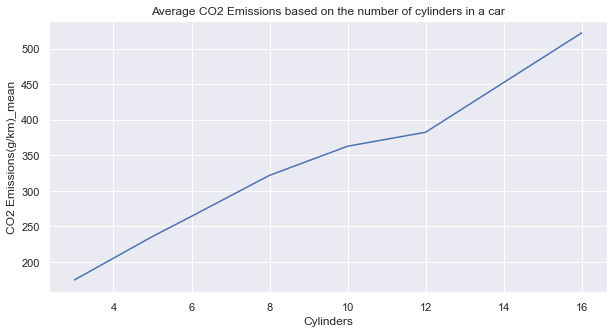

In [45]:
sns.set_theme(style="darkgrid")
sns.set(font_scale = 1)

x = grouped_df_cylinder.iloc[:,0]
y = grouped_df_cylinder.iloc[:,1]

p=sns.lineplot(x, y)
sns.set(rc = {'figure.figsize':(10,5)})
p.set_title("Average CO2 Emissions based on the number of cylinders in a car")
plt.show()

<AxesSubplot:xlabel='Cylinders', ylabel='CO2 Emissions(g/km)_mean'>

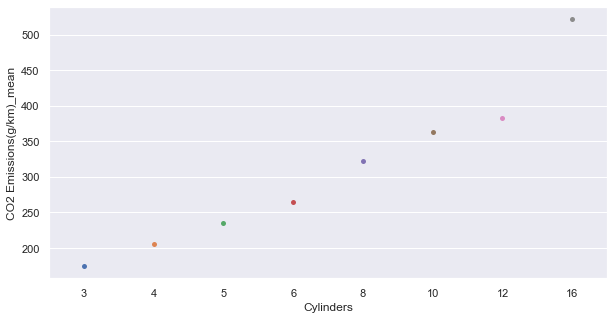

In [46]:
sns.swarmplot(data=grouped_df_cylinder, x='Cylinders', y='CO2 Emissions(g/km)_mean')

From this dotplot, it can be seen that increase in Cylinders size has an increase in average CO2 Emissions

In [47]:
grouped_df_modmak = df.groupby(['Make','Model']).agg({'CO2 Emissions(g/km)': ['mean', 'min', 'max']})
grouped_df_modmak.columns = ['CO2 Emissions(g/km)_mean', 'CO2 Emissions(g/km)_min', 'CO2 Emissions(g/km)_max']
grouped_df_modmak=grouped_df_modmak.reset_index()
grouped_df_modmak = grouped_df_modmak.drop(labels=369, axis=0)#deleting the lowercase repeated data for BUGATTI make
grouped_df_modmak=grouped_df_modmak.sort_values(by='CO2 Emissions(g/km)_mean',ascending=False).head(10)
grouped_df_modmak

,Make,Model,CO2 Emissions(g/km)_mean,CO2 Emissions(g/km)_min,CO2 Emissions(g/km)_max
299,BUGATTI,CHIRON,522.000000,522,522
518,FORD,E350 WAGON,488.000000,488,488
1084,MERCEDES-BENZ,AMG G 65,472.000000,467,476
885,LAMBORGHINI,AVENTADOR S ROADSTER,464.000000,464,464
883,LAMBORGHINI,AVENTADOR ROADSTER LP 740,461.000000,461,461
881,LAMBORGHINI,AVENTADOR COUPE LP 740,461.000000,461,461
882,LAMBORGHINI,AVENTADOR ROADSTER,460.000000,438,493
884,LAMBORGHINI,AVENTADOR S COUPE,454.000000,454,454
880,LAMBORGHINI,AVENTADOR COUPE,443.857143,412,487
616,GMC,SAVANA 3500 PASSENGER,432.857143,413,465


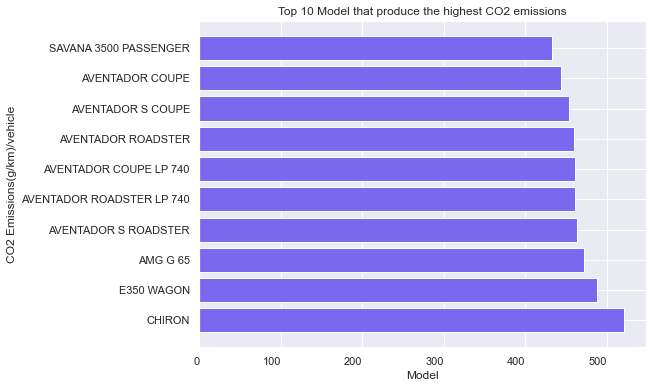

In [48]:
X = list(grouped_df_modmak.iloc[:, 1])
Y = list(grouped_df_modmak.iloc[:, 2])
# Plot the data using bar() method
plt.figure(figsize=(8,6))
plt.barh(X, Y, color='mediumslateblue')
plt.title("Top 10 Model that produce the highest CO2 emissions")
plt.xticks(rotation=0,horizontalalignment='right')
plt.ylabel("CO2 Emissions(g/km)/vehicle",fontsize=12)
plt.xlabel("Model")
plt.show()

Model CHIRON has the highest CO2 Emissions

In [49]:
grouped_df_fuel = df.groupby(['Fuel Type']).agg({'CO2 Emissions(g/km)': ['sum','count','mean']})
grouped_df_fuel.columns = ['CO2 Emissions_sum', 'Total Number of Vehicles','C02 Emissions Mean']
grouped_df_fuel=grouped_df_fuel.reset_index().sort_values(by='C02 Emissions Mean',ascending=False)
grouped_df_fuel.head(10)

,Fuel Type,CO2 Emissions_sum,Total Number of Vehicles,C02 Emissions Mean
1,Ethanol,89798,325,276.301538
3,Premium gasoline,702901,2641,266.149565
4,Regular gasoline,680250,2878,236.362057
0,Diesel,34402,146,235.630137
2,Natural gas,213,1,213.000000


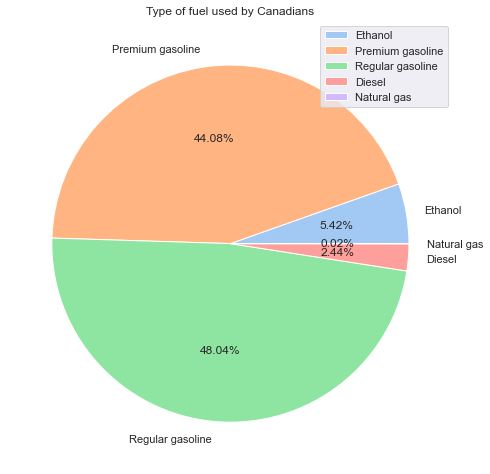

In [50]:
#X = Regular gasoline
#Z = Premium gasoline
#D = Diesel
#E = Ethanol (E85)
#N = Natural gas
data = grouped_df_fuel.iloc[:,2]
labels = grouped_df_fuel.iloc[:,0]
plt.figure(figsize=(8,10))
#plt.figaspect(1))
colors = sns.color_palette('pastel')
plt.pie(data, labels = labels, colors = colors, autopct='%0.2f%%')
plt.title('Type of fuel used by Canadians')
first_legend = plt.legend(labels,loc = 1)
plt.show()

From this pie chart, 48.38% of Canadians use Regular gasoline.

/Users/sidrakamal/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


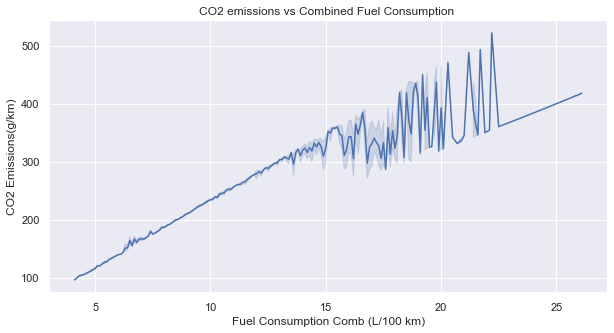

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Premium gasoline,9.9,6.7,8.5,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Premium gasoline,11.2,7.7,9.6,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Premium gasoline,6.0,5.8,5.9,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Premium gasoline,12.7,9.1,11.1,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Premium gasoline,12.1,8.7,10.6,244


In [51]:
sns.set_theme(style="darkgrid")
sns.set(font_scale = 1)

x = df.iloc[:,9]
y = df.iloc[:,10]

p=sns.lineplot(x, y)
sns.set(rc = {'figure.figsize':(10,5)})
p.set_title("CO2 emissions vs Combined Fuel Consumption ")
plt.show()
df.head(5)

/Users/sidrakamal/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


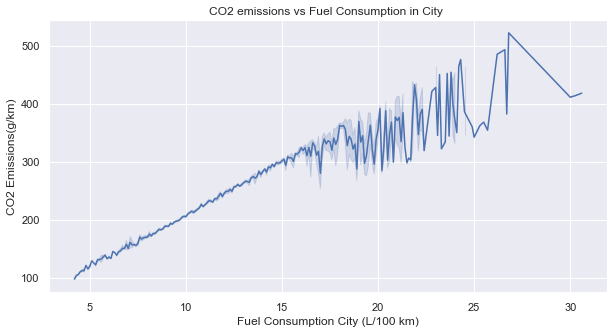

In [52]:
sns.set_theme(style="darkgrid")
sns.set(font_scale = 1)

x = df.iloc[:,7]
y = df.iloc[:,10]

p=sns.lineplot(x, y)
sns.set(rc = {'figure.figsize':(10,5)})
p.set_title("CO2 emissions vs Fuel Consumption in City ")
plt.show()

/Users/sidrakamal/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


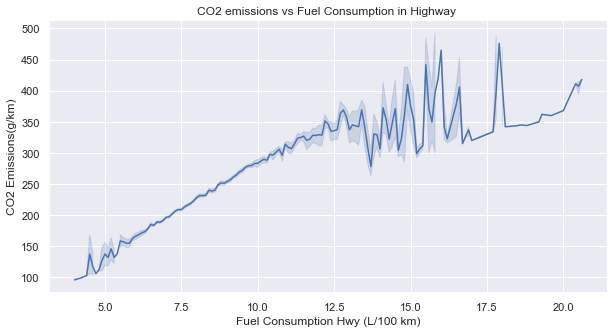

In [53]:
sns.set_theme(style="darkgrid")
sns.set(font_scale = 1)

x = df.iloc[:,8]
y = df.iloc[:,10]

p=sns.lineplot(x, y)
sns.set(rc = {'figure.figsize':(10,5)})
p.set_title("CO2 emissions vs Fuel Consumption in Highway ")
plt.show()

/Users/sidrakamal/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Fuel Consumption City (L/100 km)', ylabel='Density'>

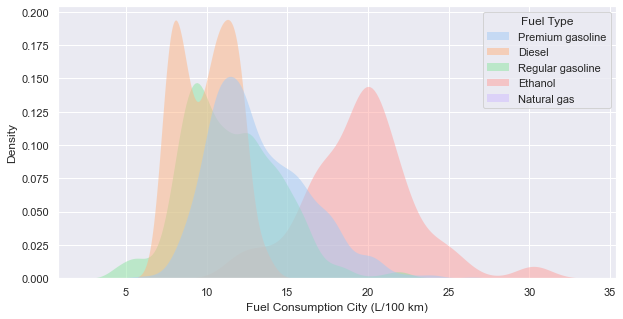

In [54]:
x=df.iloc[:,7]
sns.kdeplot(palette='pastel',
   data=df, x=x, hue="Fuel Type",
   fill=True, common_norm=False,
   alpha=.5, linewidth=0)



/Users/sidrakamal/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


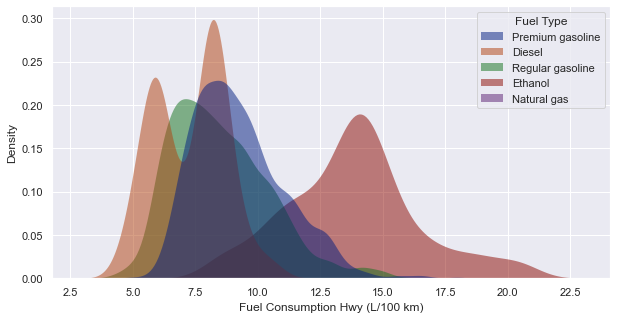

In [55]:
x=df.iloc[:,8]
g=sns.kdeplot(palette='dark',
   data=df, x=x, hue="Fuel Type",
   fill=True, common_norm=False,
   alpha=.5, linewidth=0)
plt.show(g)

From these two Kernel Density Estimate, Fuel Consumption in City is more than Fuel Consumption in the Highway.

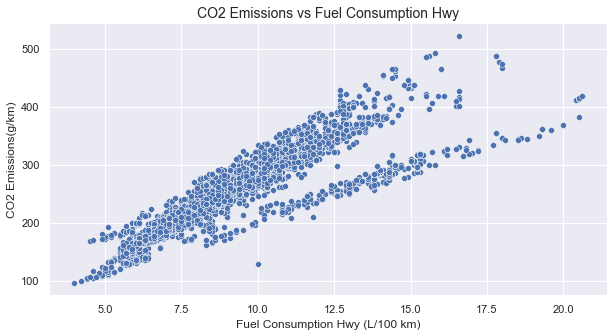

In [56]:
sns.scatterplot(data = df, x = "Fuel Consumption Hwy (L/100 km)", y = "CO2 Emissions(g/km)")
plt.title('CO2 Emissions vs Fuel Consumption Hwy', fontsize=14)

plt.show()

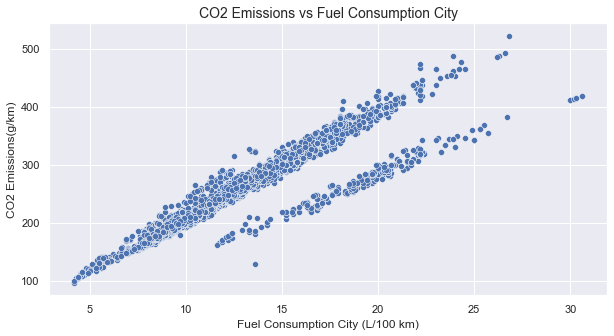

In [57]:
sns.scatterplot(data = df, x = "Fuel Consumption City (L/100 km)", y = "CO2 Emissions(g/km)")
plt.title('CO2 Emissions vs Fuel Consumption City', fontsize=14)

plt.show()

In [58]:
df[df['Fuel Type']=='Ethanol'].head(5)

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km)
145,BUICK,LACROSSE,MID-SIZE,3.6,6,AS6,Ethanol,18.4,12.2,15.6,250
147,BUICK,LACROSSE AWD,MID-SIZE,3.6,6,AS6,Ethanol,19.4,13.0,16.5,264
180,CADILLAC,ESCALADE AWD,SUV - STANDARD,6.2,8,A6,Ethanol,23.3,16.1,20.1,322
182,CADILLAC,ESCALADE ESV AWD,SUV - STANDARD,6.2,8,A6,Ethanol,25.7,17.8,22.1,354
206,CHEVROLET,EQUINOX,SUV - SMALL,3.6,6,A6,Ethanol,18.8,13.1,16.2,259


In [59]:
df[df['Fuel Type']=='Regular gasoline'].head(5)

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km)
140,BUICK,ENCLAVE,SUV - STANDARD,3.6,6,A6,Regular gasoline,14.3,9.9,12.3,283
141,BUICK,ENCLAVE AWD,SUV - STANDARD,3.6,6,A6,Regular gasoline,14.6,10.2,12.6,290
142,BUICK,ENCORE,SUV - SMALL,1.4,4,AS6,Regular gasoline,9.5,7.2,8.5,196
143,BUICK,ENCORE AWD,SUV - SMALL,1.4,4,AS6,Regular gasoline,10.2,8.0,9.2,212
144,BUICK,LACROSSE,MID-SIZE,3.6,6,AS6,Regular gasoline,13.7,8.7,11.5,264


In [60]:
grouped_df_Cylinders_Fuel = df.groupby(['Cylinders','Fuel Type']).agg({'CO2 Emissions(g/km)': ['sum','count','mean']})
grouped_df_Cylinders_Fuel.columns = ['CO2 Emissions_sum', 'Total Number of Vehicles','C02 Emissions Mean']
grouped_df_Cylinders_Fuel=grouped_df_Cylinders_Fuel.reset_index()
grouped_df_Cylinders_Fuel
#grouped_df_Cylinders_Fuel=grouped_df_Cylinders.reset_index()
#grouped_df_Cylinders_Fuel

,Cylinders,Fuel Type,CO2 Emissions_sum,Total Number of Vehicles,C02 Emissions Mean
0,3,Premium gasoline,8922,49,182.081633
1,3,Regular gasoline,5047,31,162.806452
2,4,Diesel,16663,78,213.628205
3,4,Ethanol,10359,51,203.117647
4,4,Premium gasoline,175557,815,215.407362
5,4,Regular gasoline,333418,1668,199.890887
6,5,Premium gasoline,1465,6,244.166667
7,5,Regular gasoline,4663,20,233.150000
8,6,Diesel,17739,68,260.867647
9,6,Ethanol,34260,130,263.538462


In [61]:
#sns.stripplot(data = grouped_df_Cylinders_Fuel, x = "Cylinders", y = "Engine Size(L)")
#plt.title('Engine Size(L) vs Cylinders', fontsize=14)

#plt.show()

In [62]:
#sns.barplot(data = grouped_df_Cylinders_Fuel, x = "Cylinders", y = "C02 Emissions Mean", hue='Fuel Type')
#plt.title('Engine Size(L) vs Cylinders', fontsize=14)
#plotdata[['Cylinders', "pies_2018", "pies_2019"]].plot(kind="bar", stacked=True)


#set seaborn plotting aesthetics
#sns.set(style='white')

#create stacked bar chart
#grouped_df_Cylinders_Fuel.set_index(grouped_df_Cylinders_Fuel['Cylinders']).plot(kind='bar', stacked=True, color=['steelblue', 'red','green','purple','yellow'])


In [63]:
grouped_df_class = df.groupby('Vehicle Class').agg({'CO2 Emissions(g/km)': ['mean', 'count']})
grouped_df_class.columns = ['CO2 Emissions(g/km)_mean', 'Number of Vehicles']
grouped_df_class=grouped_df_class.reset_index()
#grouped_df_class = grouped_df_class.drop(labels=369, axis=0)#deleting the lowercase repeated data for BUGATTI make
grouped_df_class=grouped_df_class.sort_values(by='CO2 Emissions(g/km)_mean',ascending=False).head(10)
grouped_df_class




,Vehicle Class,CO2 Emissions(g/km)_mean,Number of Vehicles
15,VAN - PASSENGER,397.212121,66
14,VAN - CARGO,361.500000,22
12,SUV - STANDARD,306.561017,590
6,PICKUP TRUCK - STANDARD,301.238298,470
13,TWO-SEATER,284.127841,352
5,PICKUP TRUCK - SMALL,276.322034,118
1,FULL-SIZE,265.643312,471
4,MINIVAN,261.055556,54
10,SUBCOMPACT,244.764023,517
8,STATION WAGON - MID-SIZE,240.755556,45


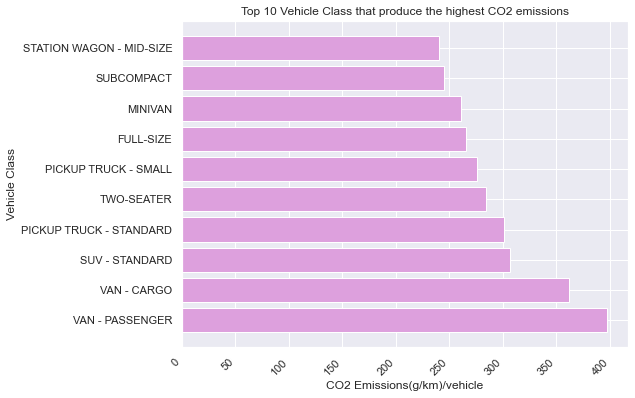

In [64]:
X = list(grouped_df_class.iloc[:, 0])
Y = list(grouped_df_class.iloc[:, 1])
# Plot the data using bar() method
plt.figure(figsize=(8,6))
plt.barh(X, Y, color='plum')
plt.title("Top 10 Vehicle Class that produce the highest CO2 emissions")
plt.xticks(rotation=45,horizontalalignment='right')
plt.ylabel('Vehicle Class')
plt.xlabel("CO2 Emissions(g/km)/vehicle")
plt.show()

Vans, SUV and Pickup Trucks have the highest CO2 Emissions.

<AxesSubplot:>

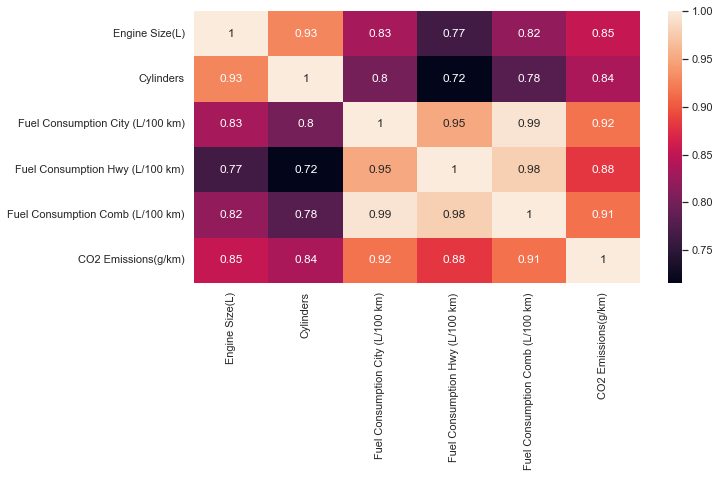

In [65]:
sns.heatmap(df.corr(), annot=True)

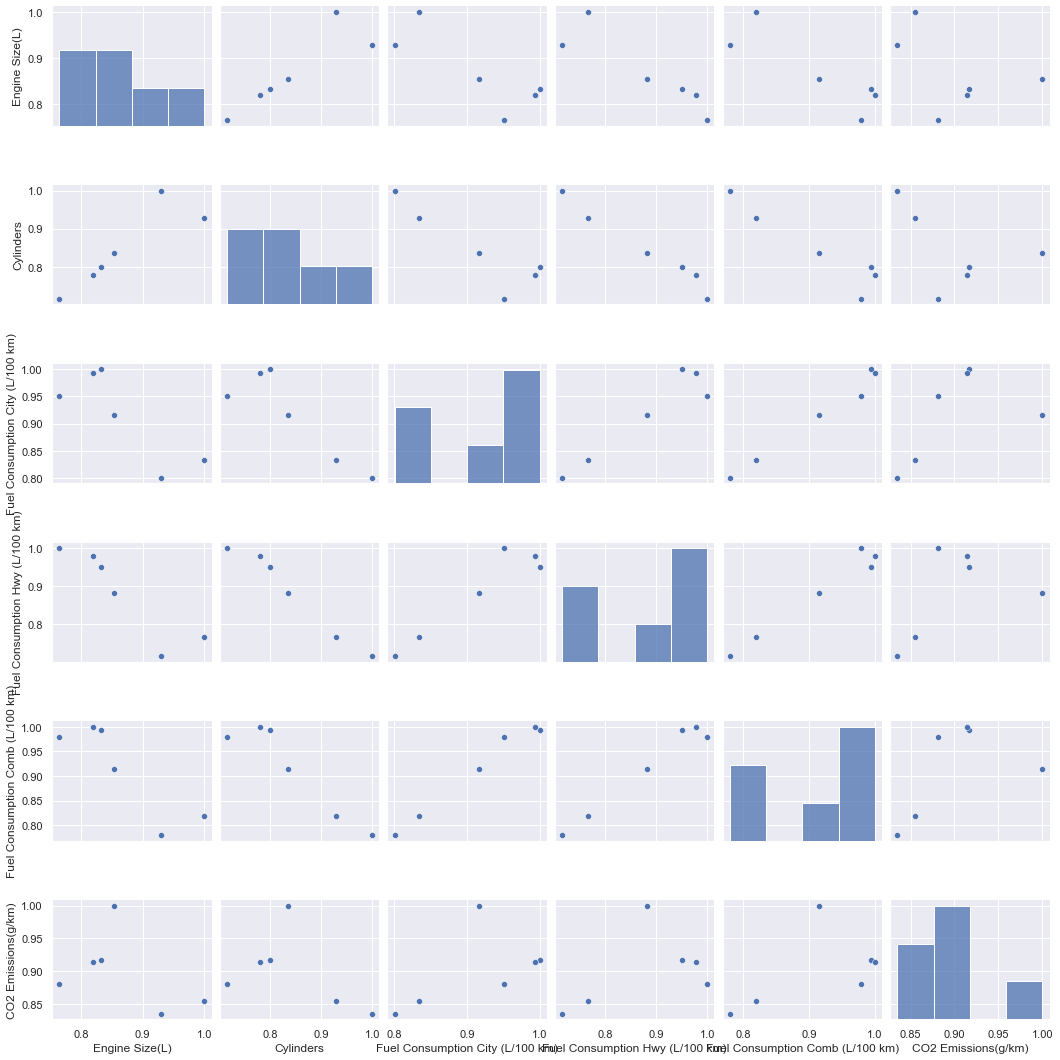

In [66]:
sns.pairplot(df.corr())
plt.subplots_adjust(hspace=0.5);